In [0]:
# 피벗 테이블
# 적은 데이터는 별 다른 수고없이 통계분석이 가능.
# 하지만, 대량의 데이터는 통계 분석하기에는 어려움.
# 수많은 데이터 중에서 원하는 데이터만 골라서 테이블을 구성한 것 => pivot table

In [0]:
import numpy as np
import pandas as pd

city = ['서울', '서울', '서울', '부산', '부산', '부산', '인천', '인천']
year = [2015, 2010, 2005, 2015, 2010, 2005, 2015, 2010]
pop = [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203]
region = ['수도권', '수도권', '수도권', '경상권', '경상권', '경상권', '수도권', '수도권']

data = {'도시':city,'연도':year,'인구':pop,'지역':region}

df = pd.DataFrame(data, index=np.arange(1,9))
print(df)
print('----------------------------------------------------')

# 도시별 연도별 인구수
print(df.pivot('도시','연도','인구')) #그룹바이 보다 훨씬 편하게 작성 가능

# pivot_table()
# pivot과 groupby를 적당히 섞은 명령
# pivot에서 지원하지 않는 다양한 집계함수 사용가능
# pivot_table(대상, 행, 열, 집계함수, 총계여부)

# pivot_table(행, 열, 대상, 집계함수, 총계여부)

# 도시별 연도별 인구수
print(df.pivot_table('인구', '도시', '연도'))
print('------------------------------------------------------')

# 도시별 연도별 인구수 (총합 포함)
print(df.pivot_table('인구', '도시', '연도', margins=True, margins_name='총합'))
print('------------------------------------------------------')

# 피봇 행을 연도/도시로 지정하고 인구수 조회
print(df.pivot_table('인구', ['연도', '도시'']))

   도시    연도       인구   지역
1  서울  2015  9904312  수도권
2  서울  2010  9631482  수도권
3  서울  2005  9762546  수도권
4  부산  2015  3448737  경상권
5  부산  2010  3393191  경상권
6  부산  2005  3512547  경상권
7  인천  2015  2890451  수도권
8  인천  2010   263203  수도권
----------------------------------------------------
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN   263203.0  2890451.0
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN   263203.0  2890451.0
------------------------------------------------------
연도       2005       2010       2015            총합
도시                                               
부산  3512547.0  3393191.0  3448737.0  3.451492e+06
서울  9762546.0  9631482.0  9904312.0  9.766113e+06
인천        NaN   263203.0  2890451.0  1.576827e+06
총합  6637546.5  4429292.0  5414500.0  5.350809e+0

In [0]:
# 식당 내 식사 후 내는 팁tips에 대한 데이터를 이용하는 피벗테이블 예제
# 단, tips데이터는 seaborn 모듈에 있음
# pip install seaborn

import seaborn as sns
# seaborn 모듈 등록

In [0]:
tips = sns.load_dataset('tips')

# tips 데이터셋 불러오기
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [0]:
# 팁을 준 고객의 성별 분류

# 성별 요일별 팁 현황
print(tips.groupby(['sex','day']).sum())
print('--------------------------------------------')
print(tips.groupby(['sex','day'])['tip'].sum())
print('--------------------------------------------')
print(tips.pivot_table('tip', ['sex', 'day'])) #평균
print('--------------------------------------------')
print(tips.pivot_table('tip', ['sex', 'day'], aggfunc=sum)) #총합
print('--------------------------------------------')

# 팁을 준 고객의 성별 분류
print(tips.groupby(['sex','day'])['tip'].count())
print('--------------------------------------------')
print(tips.pivot_table('tip', 'sex',
                      aggfunc=np.count_nonzero))
print('--------------------------------------------')
print(tips.pivot_table('sex', 'tip',
                      aggfunc=np.count_nonzero))

             total_bill     tip  size
sex    day                           
Male   Thur      561.44   89.41    73
       Fri       198.57   26.93    21
       Sat      1227.35  181.95   156
       Sun      1269.46  186.78   163
Female Thur      534.89   82.42    79
       Fri       127.31   25.03    19
       Sat       551.05   78.45    63
       Sun       357.70   60.61    53
--------------------------------------------
sex     day 
Male    Thur     89.41
        Fri      26.93
        Sat     181.95
        Sun     186.78
Female  Thur     82.42
        Fri      25.03
        Sat      78.45
        Sun      60.61
Name: tip, dtype: float64
--------------------------------------------
                  tip
sex    day           
Male   Thur  2.980333
       Fri   2.693000
       Sat   3.083898
       Sun   3.220345
Female Thur  2.575625
       Fri   2.781111
       Sat   2.801786
       Sun   3.367222
--------------------------------------------
                tip
sex    day         
Ma

In [1]:
# 성별 흡연/비흡연 고객 분류

print(tips.groupby(['sex', 'smoker'])['tip'].count())
print('---------------------------------------------')
print(tips.pivot_table('tip', ['sex', 'smoker'],
                aggfunc='count'))

NameError: ignored

In [13]:
import numpy as np
import pandas as pd

# ex) 미국 질병통제센터에서 수집한 연도별 신상애 성별 출생수 데이터
# births.csv 파일을 이용해서 데이터프레임 생성
# pivot_table 명령을 이용해서 풀어보시오


births = pd.read_csv('births.csv')
#print(births)

# 연도별 출생수
birthyear = births.pivot_table('births',
                              'year', aggfunc='sum')

# 월별 출생수
birthmonth = births.pivot_table('births',
                              'month', aggfunc='sum')

# 성별 출생수
birthgender = births.pivot_table('births',
                              'gender', aggfunc='sum')

# 연도별 성별 출생수
birthyeargender = births.pivot_table('births',
                              'year','gender', aggfunc='sum')

# 월별 성별 출생수
birthmonthgender = births.pivot_table('births',
                              'month','gender', aggfunc='sum')

print(birthyear)
print('----------------------------')
print(birthmonth)
print('----------------------------')
print(birthgender)
print('----------------------------')
print(birthyeargender)
print('----------------------------')
print(birthmonthgender)

       births
year         
1969  3600206
1970  3737800
1971  3563548
1972  3266235
1973  3146125
1974  3170631
1975  3153556
1976  3176476
1977  3332159
1978  3338300
1979  3499795
1980  3617981
1981  3635515
1982  3685457
1983  3642821
1984  3673568
1985  3765064
1986  3760695
1987  3813216
1988  3913793
1989  4045693
1990  4162917
1991  4115342
1992  4069428
1993  4004523
1994  3956925
1995  3903012
1996  3894874
1997  3884329
1998  3945192
1999  3963465
2000  4063823
2001  4031531
2002  4027376
2003  4096092
2004  4118907
2005  4145619
2006  4273225
2007  4324008
2008  4255156
----------------------------
         births
month          
1      12364197
2      11541178
3      12678844
4      12085891
5      12624972
6      12521070
7      13367556
8      13528007
9      13252831
10     12954950
11     12197967
12     12656915
----------------------------
          births
gender          
F       74035823
M       77738555
----------------------------
gender        F        M
year    

In [0]:
# 두 데이터프레임 합치기 - join/merge

# join(dfl, dfr, how='조인조건')
# merge(dl, dfr, how='컬럼')

In [29]:
# 조건에 따라 합치기
# 두 데이터프레임을 합치는 기준은 index
# index가 없는 데이터를 합치는 경우 NaN으로 저장

nums1 = [10,20,30,40,50,60,70]
nums2 = [80,90,100,110,120]
df1 = pd.DataFrame(nums1, columns=['One'], index=['a','b','c','d','e','f','g'])
df2 = pd.DataFrame(nums2, columns=['newOne'], index=['a','b','x','y','z'])
print(df1)
print('-----------------------')
print(df2)
print('-----------------------')

# 무조건 조인 : 일치하지 않는 index는 NaN으로 저장
print(df1.join(df2))
print('-----------------------')

# inner join : index가 일치하는 행 위주로 join
print(df1.join(df2, how='inner'))
print('-----------------------')

# left outer join : index가 일치하는 행 위주 join
print(df1.join(df2, how='left'))
print('-----------------------')

# right outer join : index가 일치하는 행 위주 join
print(df1.join(df2, how='right'))
print('-----------------------')

# full outer join : index가 일치하는 행 위주 join
print(df1.join(df2, how='outer'))
print('-----------------------')

   One
a   10
b   20
c   30
d   40
e   50
f   60
g   70
-----------------------
   newOne
a      80
b      90
x     100
y     110
z     120
-----------------------
   One  newOne
a   10    80.0
b   20    90.0
c   30     NaN
d   40     NaN
e   50     NaN
f   60     NaN
g   70     NaN
-----------------------
   One  newOne
a   10      80
b   20      90
-----------------------
   One  newOne
a   10    80.0
b   20    90.0
c   30     NaN
d   40     NaN
e   50     NaN
f   60     NaN
g   70     NaN
-----------------------
    One  newOne
a  10.0      80
b  20.0      90
x   NaN     100
y   NaN     110
z   NaN     120
-----------------------
    One  newOne
a  10.0    80.0
b  20.0    90.0
c  30.0     NaN
d  40.0     NaN
e  50.0     NaN
f  60.0     NaN
g  70.0     NaN
x   NaN   100.0
y   NaN   110.0
z   NaN   120.0
-----------------------


In [30]:
df1 = pd.DataFrame({'id':[1,2,3,4,5],
                   'name':['혜교','지현', '수지', '사나', '중기']})
df2 = pd.DataFrame({'id':[1,2,3,4,5],
                   'name':[99,87,52,63,48]})

print(df1)
print('-----------------------')
print(df2)
print('-----------------------')
# id 컬럼을 기준으로 합침
print(pd.merge(df1, df2, on='id'))

   id name
0   1   혜교
1   2   지현
2   3   수지
3   4   사나
4   5   중기
-----------------------
   id  name
0   1    99
1   2    87
2   3    52
3   4    63
4   5    48
-----------------------
   id name_x  name_y
0   1     혜교      99
1   2     지현      87
2   3     수지      52
3   4     사나      63
4   5     중기      48


In [38]:
df1 = pd.DataFrame({'id':[1,2,3,4,5],
                   'name':['혜교','지현', '수지', '사나', '중기'],
                   'ban':[1,1,2,2,3]})
df2 = pd.DataFrame({'id':[1,2,3,4,5],
                   'name':[99,87,52,63,48],
                   'ban':[1,2,3,6,7]})

print(df1)
print('-----------------------')
print(df2)
print('-----------------------')
# ban 컬럼을 기준으로 합침
print(pd.merge(df1, df2, on='ban'))
print('-----------------------')

# ban 컬럼을 기준으로 일치하지 않는 것도 합침
print(pd.merge(df1, df2, on='ban', how='left'))
print('-----------------------')
print(pd.merge(df1, df2, on='ban', how='right'))
print('-----------------------')

   id name  ban
0   1   혜교    1
1   2   지현    1
2   3   수지    2
3   4   사나    2
4   5   중기    3
-----------------------
   id  name  ban
0   1    99    1
1   2    87    2
2   3    52    3
3   4    63    6
4   5    48    7
-----------------------
   id_x name_x  ban  id_y  name_y
0     1     혜교    1     1      99
1     2     지현    1     1      99
2     3     수지    2     2      87
3     4     사나    2     2      87
4     5     중기    3     3      52
-----------------------
   id_x name_x  ban  id_y  name_y
0     1     혜교    1     1      99
1     2     지현    1     1      99
2     3     수지    2     2      87
3     4     사나    2     2      87
4     5     중기    3     3      52
-----------------------
   id_x name_x  ban  id_y  name_y
0   1.0     혜교    1     1      99
1   2.0     지현    1     1      99
2   3.0     수지    2     2      87
3   4.0     사나    2     2      87
4   5.0     중기    3     3      52
5   NaN    NaN    6     4      63
6   NaN    NaN    7     5      48
-----------------------


           a         b         c         d
0   0.210208  0.888831  0.472299  0.352032
1   0.145127  0.885054  0.441592  0.209662
2   0.534072  0.712465  0.830447  0.640327
3   0.246763  0.035951  0.048787  0.997522
4   0.788786  0.256066  0.014123  0.494125
5   0.029465  0.924585  0.881748  0.267029
6   0.291407  0.926004  0.831728  0.236830
7   0.335835  0.913199  0.095595  0.254415
8   0.505335  0.837627  0.311243  0.916291
9   0.859374  0.367165  0.003963  0.068497
10  0.806852  0.942947  0.255566  0.555210
11  0.196190  0.183537  0.068593  0.766209
12  0.100251  0.131198  0.934295  0.226468
13  0.128827  0.985590  0.883615  0.963900
14  0.782401  0.153670  0.032995  0.315997
-----------------------
plot() 실행 결과


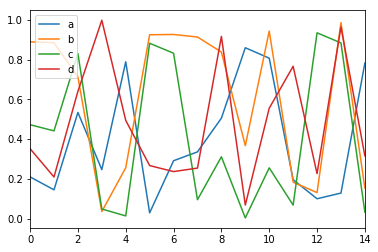

-----------------------
수직막대그래프


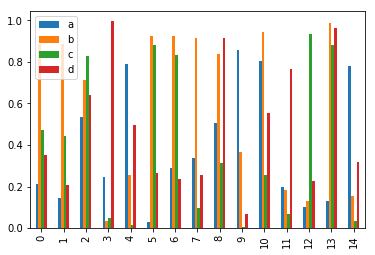

-----------------------
수평막대그래프


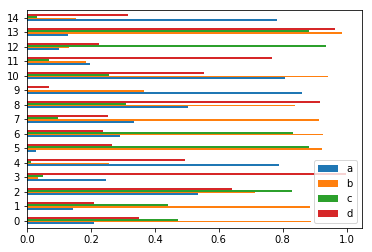

-----------------------
누적수적막대그래프


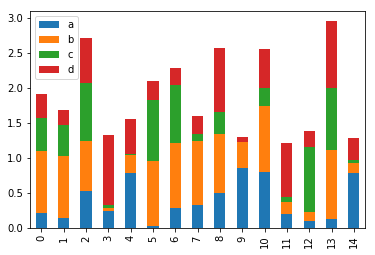

-----------------------
누적수평막대그래프


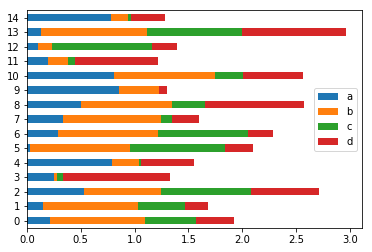

-----------------------
상자수염그래프


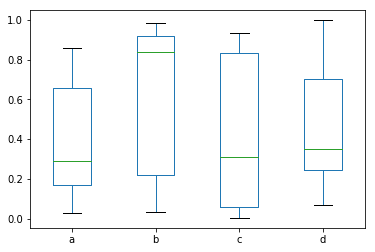

-----------------------
산점도 : a와 b


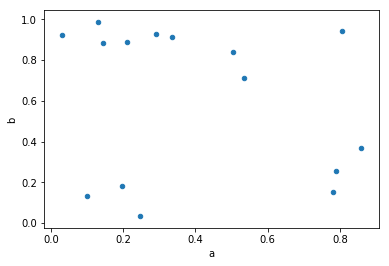

산점도 : c와 d


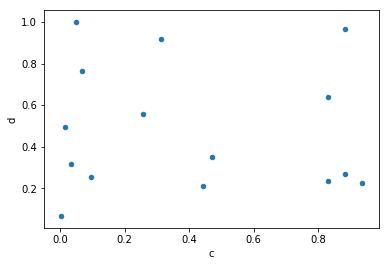

-----------------------
원 그래프
   test_data
0  87.296483
1   3.010251
2  92.339384
3  21.902419
원 그래프 : subplots=True
원 그래프 : subplots=False


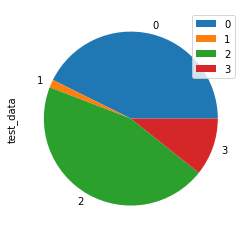

-----------------------
히스토그램


<function matplotlib.pyplot.show>

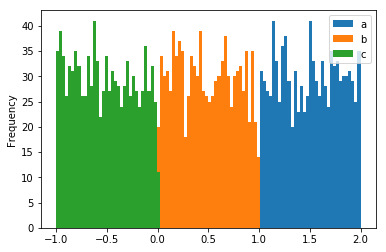

In [65]:
import matplotlib.pyplot as plt
 
# 선 그래프 : plot
np.random.seed(1906241115)
df = pd.DataFrame(np.random.rand(15,4), # 15x4 shape
                 columns = ['a','b','c','d'])
print(df)
print('-----------------------')
print('plot() 실행 결과')
df.plot()
plt.show()

# 수직막대그래프 : plot.bar #barv라고 하지는 않음 ㅎㅎ
# 수평막대그래프 : plot.barh
# 누적수적막대그래프 : plot.bar(stacked=True)
# 누적수평막대그래프 : plot.barh(stacked=True)
# 상자수염그래프 : plot.box()
# 산점도 : scatter()
# 원그래프 : pie()
# 히스토그램 : hist()

print('-----------------------')
print('수직막대그래프')
df.plot.bar()
plt.show()
print('-----------------------')
print('수평막대그래프')
df.plot.barh()
plt.show()
print('-----------------------')
print('누적수적막대그래프')
df.plot.bar(stacked=True)
plt.show()
print('-----------------------')
print('누적수평막대그래프')
df.plot.barh(stacked=True)
plt.show()
print('-----------------------')
print('상자수염그래프')
df.plot.box()
plt.show()
print('-----------------------')
print('산점도 : a와 b')
df.plot.scatter('a', 'b')
plt.show()
print('산점도 : c와 d')
df.plot.scatter('c', 'd')
plt.show()
print('-----------------------')
print('원 그래프')
print(df2)
df2 = pd.DataFrame(np.random.rand(4) * 100, 
                   columns=['test_data'])
print('원 그래프 : subplots=True')
df2.plot.pie(subplots=True)
print('원 그래프 : subplots=False')
# df2.plot.pie() #이건 오류남. pie그래프는 y컬럼이나 subplots=True가 필요하다는 메시지 뜸 <- 이건 추후 더 알아볼 것
plt.show()
print('-----------------------')
print('히스토그램')
df3 = pd.DataFrame({
    'a':np.random.rand(1000)+1,
    'b':np.random.rand(1000),
    'c':np.random.rand(1000)-1
})
df3.plot.hist(bins=100)
plt.show